In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
from datasets import load_dataset
data = pd.read_csv('https://lukeb.co/python_csv')
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

In [3]:
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')

In [4]:
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [5]:
df_counts = df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='Skill Count')
df_counts = df_counts.sort_values(by='Skill Count', ascending= False)

In [6]:
df_counts

,job_skills,job_title_short,Skill Count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [7]:
Titles = df_counts['job_title_short'].unique().tolist()
Titles =sorted(Titles[:3])
Titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

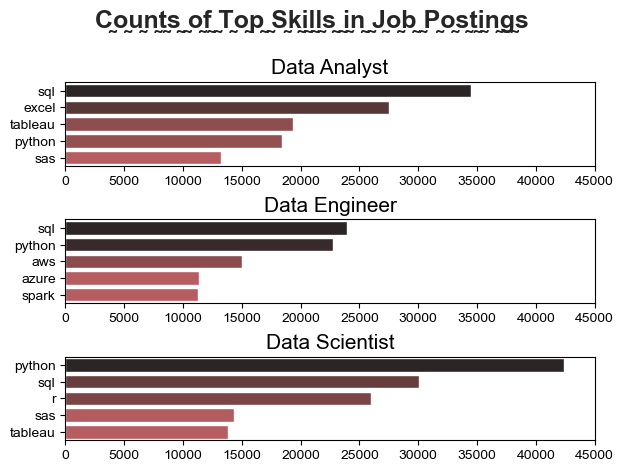

In [8]:
fig, ax = plt.subplots(len(Titles),1)
sns.set_theme(style='ticks')
for i, title in enumerate(Titles):
    df_plotting = df_counts[df_counts['job_title_short']== title].head(5)
    sns.barplot(data= df_plotting, x= 'Skill Count', y='job_skills', ax= ax[i], hue= 'Skill Count', palette='dark:r_r', legend= False)
    ax[i].set_title(title, fontsize= 15)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,45000)

fig.suptitle('\u0330'.join('Counts of Top Skills in Job Postings'), fontsize= 18, fontweight= 'bold')
fig.tight_layout(h_pad=0.5)
plt.show()

In [9]:
df_title_count = df_US['job_title_short'].value_counts()
df_title_count = df_title_count.reset_index(name= 'Count')

In [10]:
df_skills_percent = pd.merge(df_counts, df_title_count, how= 'left', on= 'job_title_short')
df_skills_percent['Skill Percent'] = 100 * (df_skills_percent['Skill Count'] / df_skills_percent['Count'])

df_skills_percent

,job_skills,job_title_short,Skill Count,Count,Skill Percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


In [11]:
df_skills_percent

,job_skills,job_title_short,Skill Count,Count,Skill Percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


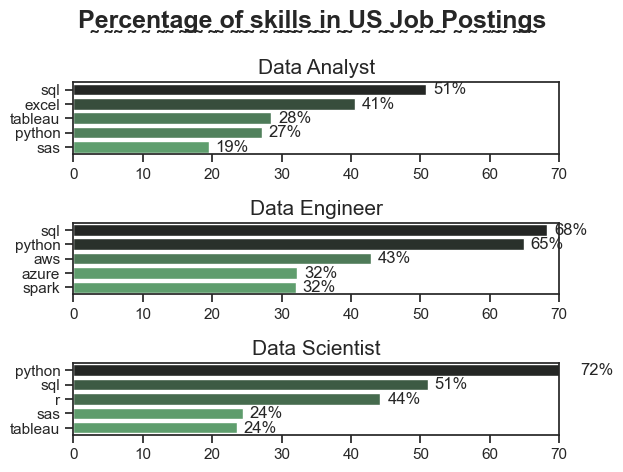

In [12]:
fig, ax = plt.subplots(len(Titles),1)
sns.set_theme(style='ticks')
for i, title in enumerate(Titles):
    df_plotting = df_skills_percent[df_skills_percent['job_title_short']== title].head(5)
    sns.barplot(data= df_plotting, x= 'Skill Percent', y='job_skills', ax= ax[i], hue='Skill Percent', palette='dark:g_r', legend= False)
    ax[i].set_title(title, fontsize= 15)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,70)

    for p, txt in enumerate(df_plotting['Skill Percent']):
        ax[i].text(txt +1, p, f'{txt:.0f}%', va= 'center')

fig.suptitle('\u0330'.join('Percentage of skills in US Job Postings'), fontsize= 18, fontweight= 'bold')
fig.tight_layout()
plt.show()